<a href="https://colab.research.google.com/github/sarthak-314/100-Days-in-Data/blob/master/1.%20Data%20Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA COLLECTION**
---


## Collecting **Time Sheets**




All my Time Sheets are stored in my Google Drive in the folder 100 Days. The path structure for a Time Sheet is 100 Days -> #Week -> #Date.

Ex. Path for Google Sheet for 15th August will be  - drive/100 Days/Week1/15-Aug


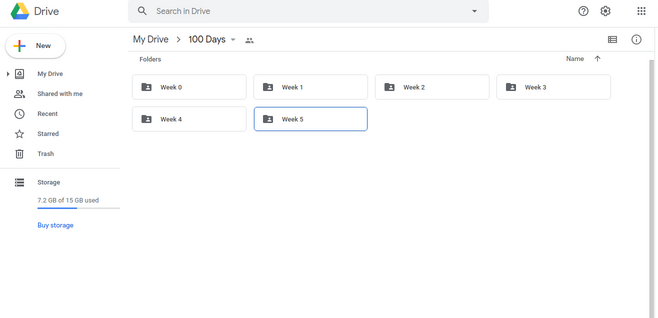

In [ ]:
#CONFIG
import os
import pandas as pd
TIME_SHEETS_PATH = './100 Days'

#Going inside google drive
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [ ]:
# Each week folder contains the Time Sheets for that week
week_folders = os.listdir(TIME_SHEETS_PATH)
time_sheets = []
for week_folder in week_folders: 
    week_path = os.path.join(TIME_SHEETS_PATH, week_folder)
    if os.path.isdir(week_path):
        google_sheets_for_the_week = [f.split('.')[0] for f in os.listdir(week_path)]
        time_sheets.extend(google_sheets_for_the_week)

print('Total days recorded : ', len(time_sheets))

Total days recorded :  88


I am use **gspread** to handle Google Sheets

gsread is a python API for Google Sheets. It can be used to open and read the google sheets from it's path


More info here - https://gspread.readthedocs.io/en/latest/

In [ ]:
#Boilerplate code for gspread authentication 
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

Let's try using gspread on a single sheet


In [ ]:
HEADER = ['time_span', 'category', 'task', 'productivity']

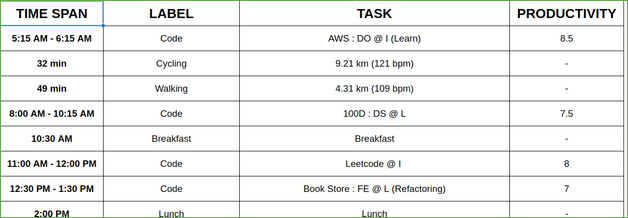

In [ ]:
worksheet = gc.open(time_sheets[5]).sheet1
#get_all_values to get a list of rows
rows = worksheet.get_all_values()

#Convert to dataframe
skip_first_row = rows[1:]
df = pd.DataFrame.from_records(skip_first_row, columns=HEADER)
df.head()

,time_span,category,task,productivity
0,32 min,Walking,2.29 km (95 bpm),-
1,16 min,Cycling,4.67 km (116 bpm),-
2,12:15 PM - 1:45 PM,CT3,100D : DS @ I,8
3,4:15 PM - 5:45 PM,CT7,100D : DS @ I,7


Ex. Row #4 (index 3) is a snapshot of what I did during 5:15 AM to 6:15 AM. 

The task column value tells me that I was learning AWS (Dev Ops) 

and the productivity value tells me that during this session I was pretty zoned in


Let's convert all the sheets to pandas DataFrame

After creating a dataframe I'm going to save them in my Google Drive as a csv file with the same name

In [ ]:
#Saving the dataframes
for time_sheet in time_sheets: 
    worksheet = gc.open(time_sheet).sheet1
    rows = worksheet.get_all_values()
    df = pd.DataFrame.from_records(rows[1:], columns=HEADER)
    save_path = os.path.join('./100D Data/TimeSheets', time_sheet + '.csv')
    df.to_csv(save_path, index=False)

All the sheets are now saved as a csv file in the Google Drive. 

Let's do the same for the Smartwatch Sheets


### **Smartwatch Sheets**

(Future Sarthak : Ignore the rest of the notebook. I have automated the collection process for smartwatch.)

In [ ]:
SMARTWATCH_SHEETS_PATH = './Smartwatch Stats'

In [ ]:
smartwatch_sheet_files = os.listdir(SMARTWATCH_SHEETS_PATH)
smartwatch_sheets = [f.split('.')[0] for f in smartwatch_sheet_files]
smartwatch_sheets

['Week 3', 'Week 2', 'Week 1']

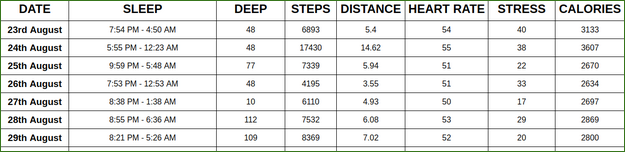

In [ ]:
SMARTWATCH_SHEETS_HEADER = ['date', 'sleep', 'deep_sleep', 'steps_walked', 'km_walked', 'avg_heart_rate', 'stress', 'calories']
df = pd.DataFrame()
df_week1 = pd.DataFrame()
for sm_sheet in smartwatch_sheets: 
    smsheet = gc.open(sm_sheet).sheet1
    rows = smsheet.get_all_values()
    df = pd.DataFrame.from_records(rows[1:], columns=SMARTWATCH_SHEETS_HEADER)
    df.replace('', float('NaN'), inplace=True)
    df.dropna(inplace=True)
    save_path = os.path.join('./100D Data/Smartwatch Sheets/', sm_sheet + '.csv')
    df.to_csv(save_path, index=False)
    if 'Week 1' in sm_sheet: 
        df_week1 = df
df_week1.head()

,date,sleep,deep_sleep,steps_walked,km_walked,avg_heart_rate,stress,calories
0,23rd August,7:54 PM - 4:50 AM,48,6893,5.4,54,40,3133
1,24th August,5:55 PM - 12:23 AM,48,17430,14.62,55,38,3607
2,25th August,9:59 PM - 5:48 AM,77,7339,5.94,51,22,2670
3,26th August,7:53 PM - 12:53 AM,48,4195,3.55,51,33,2634
4,27th August,8:38 PM - 1:38 AM,10,6110,4.93,50,17,2697
